In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *

## Stationary state

Start with a 2 state system with both states at the same energy.

The hamiltonian matrix will therefore take the form

$$
\begin{bmatrix}
 E_0  &  0  \\
 0  &  E_0  \\
\end{bmatrix}
$$

In this example we will set $E_0=1$.

In the langauge of QuTip, we would write `qeye(2)`

In [91]:
# This sets the energy of the system and hence the frequency
E0 = 1

In [92]:
# It appears to be the case that in QuTip hbar = 1
H = E0*qeye(2)
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

Let's initialise the 2 state system. In Qutip, this can be done in several ways (cf QuTip [intro notebook](https://github.com/jrjohansson/qutip-lectures/blob/master/Lecture-0-Introduction-to-QuTiP.ipynb))

For $\vert+\rangle$ state: `Qobj([[1], [0]])` or `basis(2, 0)`

For $\vert-\rangle$ state: `Qobj([[0], [1]])` or `basis(2, 1)`


In [93]:
psi0 = basis(2, 0)
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Now, let's evolve the state $\psi$ over time by solving the Schrödinger equation

$$
i \hbar \frac{d}{d t}\vert\psi(t)\rangle = \hat H\vert\psi(t)\rangle
$$

In [98]:
times = np.linspace(0.0, 10.0, 1000) # simulation time
result = sesolve(H, psi0, times)

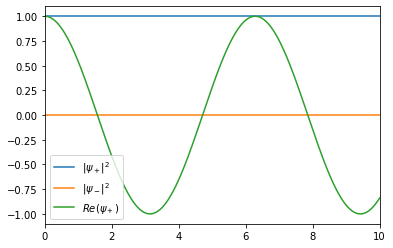

In [99]:
P_plus = np.zeros(len(times))
P_minus = np.zeros(len(times))
P_plus_real = np.zeros(len(times))

for i, state in enumerate(result.states):
    P = np.abs(state)**2
    P_plus[i] = P[0]
    P_minus[i] = P[1]
    P_plus_real[i] = np.real(state)[0]

    
df = pd.DataFrame(data={"$|\psi_+|^2$":P_plus, "$|\psi_-|^2$":P_minus, "$Re(\psi_+)$":P_plus_real}, index=times)
df.plot();

The probability to find the system in the $\vert+\rangle$ state remains constant throughout because it is a stationary state, i.e. a state of constant energy.

The frequency of oscillations of the amplitude is determined by the $a$ parameter which we set to equal 1 at the start.

## Coupling between two states of the same energy

In [126]:
E0 = 1.0
A = 0.1 # coupling "strength"

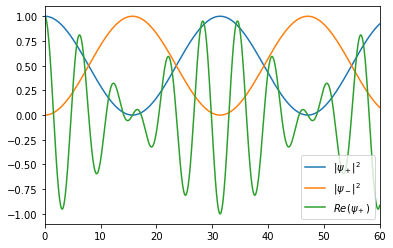

In [125]:

H = E0*qeye(2) + A*sigmax()
times = np.linspace(0.0, 60.0, 1000) # simulation time
result = sesolve(H, psi0, times)
P_plus = np.zeros(len(times))
P_minus = np.zeros(len(times))
P_plus_real = np.zeros(len(times))

for i, state in enumerate(result.states):
    P = np.abs(state)**2
    P_plus[i] = P[0]
    P_minus[i] = P[1]
    P_plus_real[i] = np.real(state)[0]

    
df = pd.DataFrame(data={"$|\psi_+|^2$":P_plus, "$|\psi_-|^2$":P_minus, "$Re(\psi_+)$":P_plus_real}, index=times)
df.plot();